In [1]:
import json
import os
import logging
import numpy as np


from PIL import Image
import torchvision.transforms as transforms


from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt


import torch
import torch.nn.functional as F

import captum
from captum.attr import NoiseTunnel
from captum.attr import IntegratedGradients, Occlusion, LayerGradCam, LayerAttribution
from captum.attr import visualization as viz


from classifier import CIFAR10CLASSIFIER
from cifar10_train  import CIFAR10Classifier


In [1]:
!torch-model-archiver --model-name cifar10_test --version 1.0 --model-file classifier.py --serialized-file resnet.pth --handler cifar10_handler.py 


In [2]:
!torchserve --start --model-store model_store --ncs --models cifar10_test=cifar10_test.mar

TorchServe is already running, please use torchserve --stop to stop TorchServe.


In [24]:
!curl -H "Content-Type: application/json" --data @input.json http://127.0.0.1:8080/v1/models/cifar10_test:predict


{
  "predictions": [
    3
  ]
}

In [172]:
!curl -H "Content-Type: application/json" --data @input.json http://127.0.0.1:8080/v1/models/cifar10_test:explain


{
  "explanations": [
    [
      [
        0.002878074360339187,
        0.003159963505386366,
        0.0007577316384106059
      ],
      [
        0.002776174769113437,
        0.0021635868530373663,
        0.00038819725034307186
      ],
      [
        -0.0011254067261568287,
        -0.0025571216506864642,
        -0.0010511063767812343
      ],
      [
        -0.0009373761401883752,
        -0.00236684281115288,
        -0.0004051846566764878
      ],
      [
        0.0007048010769752733,
        0.0005509760273802011,
        0.000778604850649445
      ],
      [
        -0.001957497155249,
        -0.0018531835181716902,
        -0.0007555341260169447
      ],
      [
        0.000543343998308589,
        -0.0006322072661151875,
        -5.179619242411165e-05
      ],
      [
        -0.00023572792159486225,
        -0.002402908141249876,
        -0.0017456195779039297
      ],
      [
        -0.0017289750101623907,
        -0.0038026239970598255,
        -0.0013842410838

        0.0009225352229118048
      ],
      [
        0.0016869252782958425,
        0.0037747466027808997,
        0.0037856653744107547
      ],
      [
        0.0010682096619299127,
        0.0028113354259351585,
        0.0020398506310740105
      ],
      [
        0.0006037083664242629,
        0.001454450856698774,
        0.0011031121853592755
      ],
      [
        -0.001689723965901673,
        -0.001133005473694027,
        -0.0022581119670902873
      ],
      [
        0.002332129703768808,
        0.0012003654062565934,
        0.001224639447662944
      ],
      [
        -9.500957156433737e-05,
        -0.000915756199987951,
        -0.002304344086444511
      ],
      [
        -0.002332217623747119,
        -0.0024630900005793935,
        -0.0030719555586131444
      ],
      [
        -0.0004899777500534725,
        -0.0003338861074728069,
        0.0010725878447403194
      ],
      [
        0.0018026407690615522,
        0.002143267145400546,
        0.0039645

      [
        0.0003606711932642083,
        -4.599187117931283e-05,
        -0.0001877429392120445
      ],
      [
        1.691590453861655e-05,
        2.2388479934041937e-05,
        5.9428863567498564e-05
      ]
    ],
    [
      [
        0.0006115899491007368,
        -0.00016102526503917463,
        0.00014546118819870884
      ],
      [
        0.0019361458686004364,
        0.0017671966393069188,
        0.0010192113453387913
      ],
      [
        0.0018671410066742544,
        0.0017682004219169286,
        0.0010381342189919394
      ],
      [
        0.00029016737037903205,
        -3.514036295511595e-05,
        9.633324572765022e-05
      ],
      [
        -0.0005991421786960224,
        -0.0003559164015200207,
        -0.00014859075466438503
      ],
      [
        -0.0009664478323115099,
        -0.0008203125913454192,
        -0.0006759390175304221
      ],
      [
        0.002994540635829312,
        0.0034330296497334435,
        0.0018978397561648392
 

        -8.346349549892524e-05
      ],
      [
        0.00014403283507971427,
        0.00042927541392831704,
        0.00013738449294573238
      ],
      [
        0.001161891748920873,
        0.0015979750304241423,
        0.0007362747272822723
      ],
      [
        0.00022215847089983377,
        0.0006262849216411697,
        0.00028971364239788964
      ],
      [
        -1.0409818147745037e-05,
        7.536219353118134e-05,
        0.00010590604240392828
      ],
      [
        0.00019462809923741702,
        -4.35219982878883e-05,
        -2.0097831777008127e-06
      ],
      [
        0.0001191603670048784,
        1.8332358605350272e-05,
        4.8871497722173026e-05
      ],
      [
        3.604581069048175e-05,
        3.806278443375565e-06,
        8.799561072731774e-05
      ],
      [
        -0.0004271610663655917,
        -0.0006906972441783566,
        -0.0005136515872213588
      ],
      [
        -0.00046856142707042735,
        -0.001017706477297744,
 

        0.0003832234859642862,
        0.0004885847427351425,
        0.0003101436022474787
      ],
      [
        0.0011056842987117483,
        0.0015985952872903774,
        0.0007909781769494302
      ],
      [
        0.00037521552209456374,
        0.0006133240869063349,
        0.00029309135454332676
      ],
      [
        2.031678148404793e-05,
        9.421677929330082e-05,
        -5.51045931685375e-06
      ],
      [
        -0.00017099615979578205,
        -3.159943271123594e-05,
        -0.00019535171906792027
      ],
      [
        -3.088034521976564e-05,
        -0.00035658633037991385,
        -7.786148264661399e-06
      ],
      [
        -0.00033630250409475484,
        -0.0008356384905496291,
        -0.000256305610066325
      ],
      [
        0.0001496324149427057,
        0.00036734550975830104,
        0.00010352599791119958
      ],
      [
        -0.00045207035099335087,
        -0.0003486195077753856,
        -6.227454485435149e-05
      ],
      [

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
!curl -H "Content-Type: application/json" --data @input.json http://127.0.0.1:8080/v1/models/cifar10_test:explain > cifar10_explain_IG.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  144k    0    84  100  144k      0    339  0:07:16  0:07:15  0:00:01    190  144k      0   2136  0:01:09  0:01:09 --:--:--     00  144k      0    448  0:05:30  0:05:30 --:--:--     0


In [15]:
explainations_file=open('./cifar10_explain_IG.json', 'r')
explainations_json = json.load(explainations_file)
attributions = explainations_json['explanations']
attributions = np.array(attributions)
attributions = attributions.reshape((224,224,3))

###### Captum Vis and Captum Insights

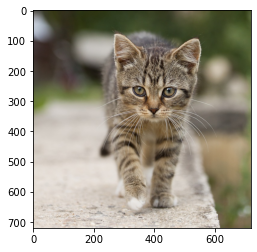

In [3]:
test_img = Image.open('./test.png')
test_img_data = np.asarray(test_img)
plt.imshow(test_img_data)
plt.show()

In [4]:
# model expects 224x224 3-color image
transform = transforms.Compose([
 transforms.Resize(224),
 transforms.CenterCrop(224),
 transforms.ToTensor()
])

# standard ImageNet normalization
transform_normalize = transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
 )

transformed_img = transform(test_img)
input_img = transform_normalize(transformed_img)
input_img = input_img.unsqueeze(0) # the model requires a dummy batch dimension

In [5]:
labels_path = './class_mapping.json'
with open(labels_path) as json_data:
    idx_to_labels = json.load(json_data)   

In [6]:
list(map(lambda k: idx_to_labels[k], idx_to_labels.keys()))

['plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
model = CIFAR10Classifier()
model_pt_path ="./resnet.pth"
model.load_state_dict(torch.load(model_pt_path,map_location=torch.device('cpu')))
model.eval()

CIFAR10Classifier(
  (model_conv): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequentia

In [8]:
model.model_conv.layer4[2].conv3

Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)

In [9]:
output = model(input_img)
output = F.softmax(output, dim=1)
prediction_score, pred_label_idx = torch.topk(output, 1)

pred_label_idx.squeeze_()

predicted_label = idx_to_labels[str(pred_label_idx.squeeze_().item())]
print('Predicted:', predicted_label, '(', prediction_score.squeeze().item(), ')')

Predicted: cat ( 0.18199242651462555 )


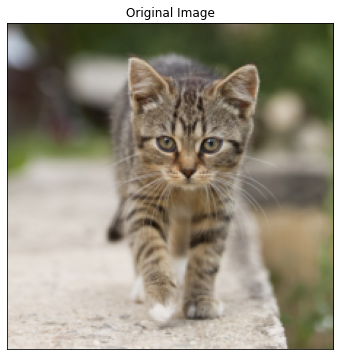

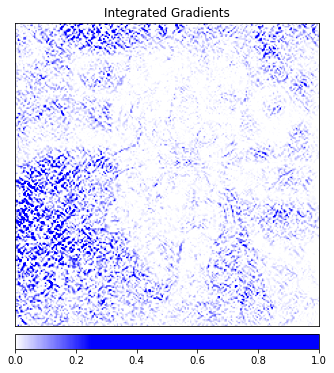

In [17]:
# Show the original image for comparison
#np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1,2,0))
_ = viz.visualize_image_attr(None, np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)), 
                      method="original_image", title="Original Image")

default_cmap = LinearSegmentedColormap.from_list('custom blue', 
                                                 [(0, '#ffffff'),
                                                  (0.25, '#0000ff'),
                                                  (1, '#0000ff')], N=256)

_ = viz.visualize_image_attr(attributions,
                             np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                             method='heat_map',
                             cmap=default_cmap,
                             show_colorbar=True,
                             sign='positive',
                             title='Integrated Gradients')

In [13]:
occlusion = Occlusion(model)

attributions_occ = occlusion.attribute(input_img,
                                       target=pred_label_idx,
                                       strides=(3, 8, 8),
                                       sliding_window_shapes=(3,15, 15),
                                       baselines=0)

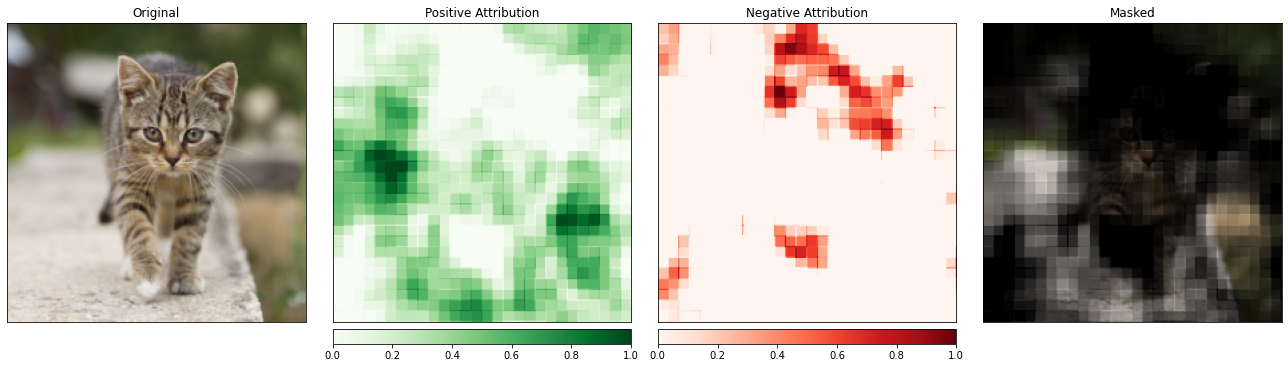

In [14]:
_ = viz.visualize_image_attr_multiple(np.transpose(attributions_occ.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      ["original_image", "heat_map", "heat_map", "masked_image"],
                                      ["all", "positive", "negative", "positive"],
                                      show_colorbar=True,
                                      titles=["Original", "Positive Attribution", "Negative Attribution", "Masked"],
                                      fig_size=(18, 6)
                                     )

In [26]:
layer_gradcam = LayerGradCam(model, model.model_conv.layer4[2].conv3)
attributions_lgc = layer_gradcam.attribute(input_img, target=pred_label_idx)

/home/arvind/anaconda3/lib/python3.8/site-packages/captum/_utils/gradient.py:53: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


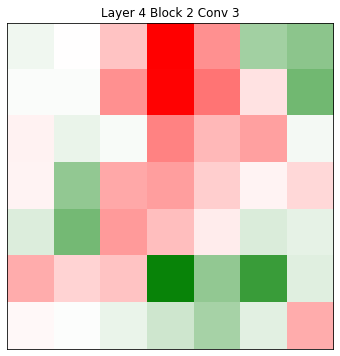

In [28]:
_ = viz.visualize_image_attr(attributions_lgc[0].cpu().permute(1,2,0).detach().numpy(),
                             sign="all",
                             title="Layer 4 Block 2 Conv 3")

torch.Size([1, 1, 7, 7])
torch.Size([1, 1, 224, 224])
torch.Size([1, 3, 224, 224])


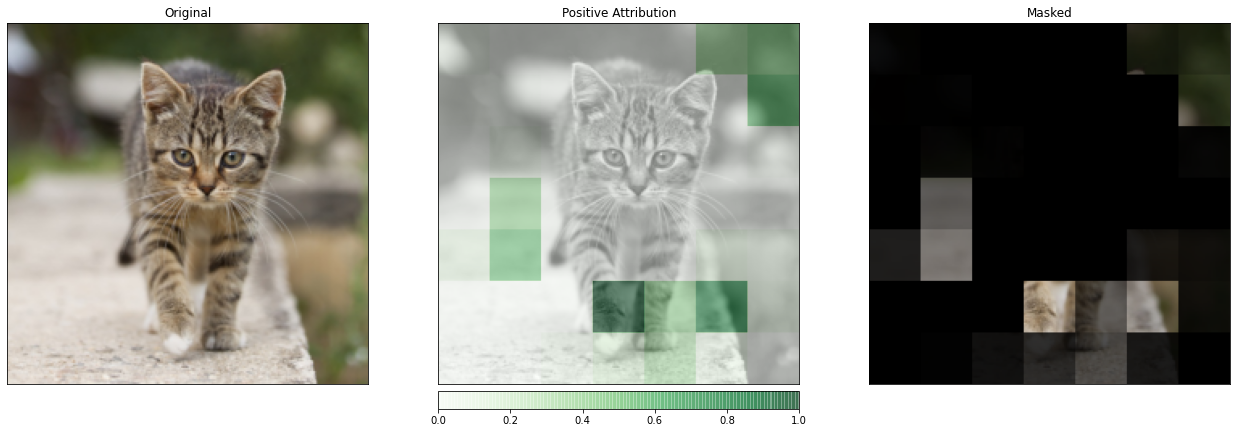

In [29]:
upsamp_attr_lgc = LayerAttribution.interpolate(attributions_lgc, input_img.shape[2:])

print(attributions_lgc.shape)
print(upsamp_attr_lgc.shape)
print(input_img.shape)

_ = viz.visualize_image_attr_multiple(upsamp_attr_lgc[0].cpu().permute(1,2,0).detach().numpy(),
                                      transformed_img.permute(1,2,0).numpy(),
                                      ["original_image","blended_heat_map","masked_image"],
                                      ["all","positive","positive"],
                                      show_colorbar=True,
                                      titles=["Original", "Positive Attribution", "Masked"],
                                      fig_size=(18, 6))

In [15]:
imgs = ['./test.png',"./0001.png"]

for img in imgs:
    img = Image.open(img)
    transformed_img = transform(img)
    input_img = transform_normalize(transformed_img)
    input_img = input_img.unsqueeze(0) # the model requires a dummy batch dimension

    output = model(input_img)
    output = F.softmax(output, dim=1)
    prediction_score, pred_label_idx = torch.topk(output, 1)
    pred_label_idx.squeeze_()
    predicted_label = idx_to_labels[str(pred_label_idx.squeeze_().item())]
    print('Predicted:', predicted_label, '/', pred_label_idx.item(), ' (', prediction_score.squeeze().item(), ')')

Predicted: cat / 3  ( 0.18199242651462555 )
Predicted: horse / 7  ( 0.15090999007225037 )


In [16]:
from captum.insights import AttributionVisualizer, Batch
from captum.insights.attr_vis.features import ImageFeature

# Baseline is all-zeros input - this may differ depending on your data
def baseline_func(input):
    return input * 0

# merging our image transforms from above
def full_img_transform(input):
    i = Image.open(input)
    i = transform(i)
    i = transform_normalize(i)
    i = i.unsqueeze(0)
    return i


input_imgs = torch.cat(list(map(lambda i: full_img_transform(i), imgs)), 0)

visualizer = AttributionVisualizer(
    models=[model],
    score_func=lambda o: torch.nn.functional.softmax(o, 1),
    classes=list(map(lambda k: idx_to_labels[k], idx_to_labels.keys())),
    features=[
        ImageFeature(
            "Photo",
            baseline_transforms=[baseline_func],
            input_transforms=[],
        )
    ],
    dataset=[Batch(input_imgs, labels=[3,7])]
)

In [17]:
visualizer.render(debug =True)

CaptumInsights(insights_config={'classes': ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sh…

Output()

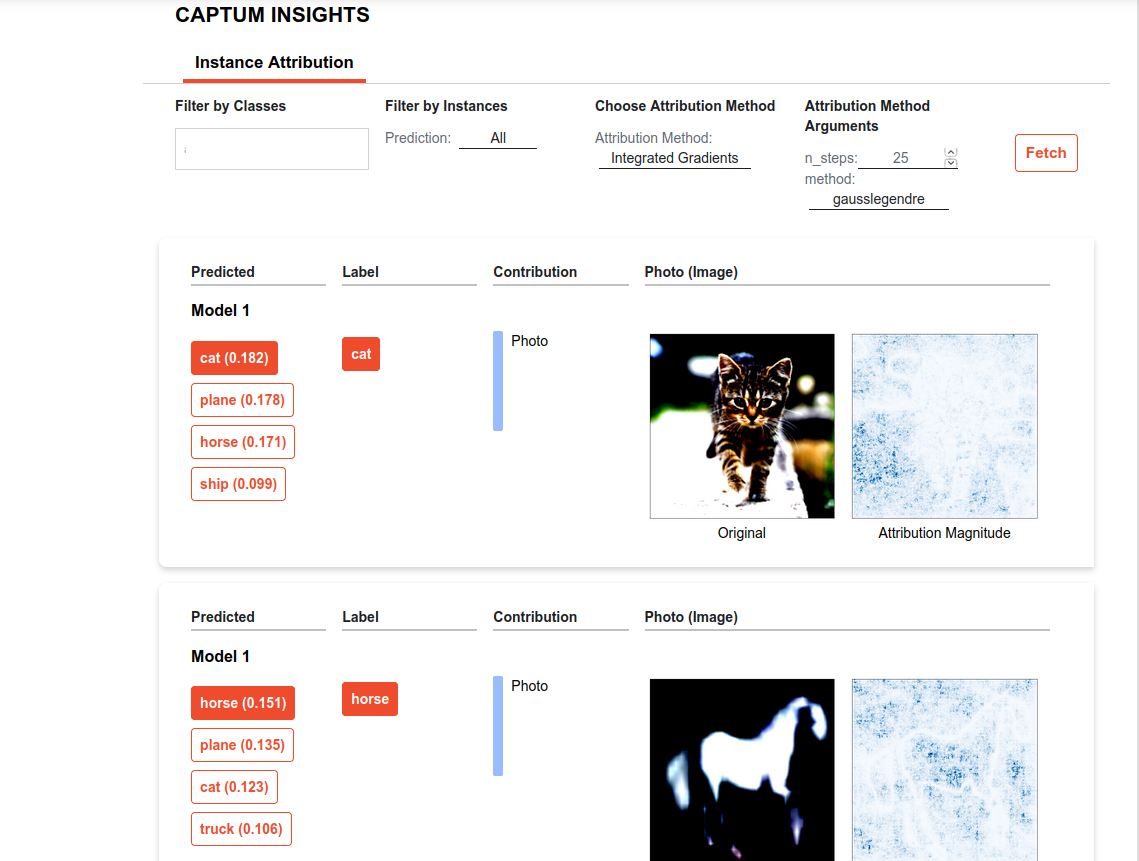

In [18]:
import IPython.display
IPython.display.Image(filename="CIFAR10_Captum_Insights.png")